In [294]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [295]:
combined_imputed_data = pd.read_csv("data/combined_imputed_data.csv")
combined_imputed_data

,ERK1_1,RAD51,Cyc_D1,Vimentin,aSMA,E_cadherin,ER_alpha,PR,EGFR,Rb,...,CK7,HER2,Area,MajorAxisLength,MinorAxisLength,Solidity,Extent,Origin,X_centroid,Y_centroid
0,-3.595558,-3.882695,-2.926872,-1.661854,-1.625706,-1.500650,-2.434179,-1.776954,-1.788399,-1.789617,...,-0.192604,-0.540682,0.545628,1.225162,0.668850,-2.372059,0.204272,no_spatial 6,NaN,NaN
1,-3.122335,-3.430143,-2.988966,-1.729636,-1.340509,-1.470941,-2.450142,-1.002487,-1.774023,-1.467059,...,-0.359316,-0.377944,-0.812858,-0.644365,-0.872131,0.046217,-0.071576,no_spatial 6,NaN,NaN
2,-3.161604,-3.409555,-2.257401,-1.116841,-1.960561,-1.368477,-1.974097,-0.886901,-1.379818,-1.181703,...,-0.094802,-0.192820,1.393328,1.587158,1.292884,-1.816592,-1.642430,no_spatial 6,NaN,NaN
3,-3.591288,-3.930810,-3.080454,-1.122569,-2.359495,-1.533035,-2.482795,-0.968276,-1.927806,-1.513882,...,-0.337184,-0.333235,1.406231,1.948322,0.654407,-2.476722,-1.645661,no_spatial 6,NaN,NaN
4,-1.094735,-0.720404,-2.518162,-1.321868,0.113385,-1.286915,-2.030915,-1.187440,-1.201466,-1.015339,...,-0.104410,-0.253415,2.210347,1.456916,2.430535,-0.606386,-0.354902,no_spatial 6,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39505,-0.800093,-0.676295,-1.774016,0.276133,-1.236738,-0.178042,-0.840656,-0.871315,-0.152490,0.009029,...,-0.173746,-0.211394,-0.383608,-0.527197,-0.117185,-0.461538,-0.263712,spatial 6,-1.335348,2.158059
39506,-3.221611,-3.522214,-2.952610,-1.127199,-2.324005,-2.107178,-2.667511,-1.463524,-2.514484,-1.074866,...,1.467241,0.236579,1.011520,0.755185,1.018351,0.886167,0.479981,spatial 6,0.908954,2.250414
39507,-3.344467,-3.660041,-2.735941,-1.113190,-1.336823,-1.357723,-2.086668,-1.029870,-1.605803,-1.183751,...,-0.356455,-0.333818,0.467007,0.713742,0.275522,-0.649580,-0.291666,spatial 6,0.879044,2.257120
39508,-3.207266,-3.375565,-2.709939,-1.214932,-2.287660,-1.378052,-2.183403,-1.458918,-1.604489,-1.841007,...,-0.433457,-0.539574,-0.571010,0.716336,-1.684765,-1.782794,-1.791389,spatial 6,1.707854,2.281393


In [296]:
max_neighbor = int(combined_imputed_data["Origin"].max().split(" ")[-1])
max_neighbor

6

In [297]:
sp_imputed_data = combined_imputed_data[combined_imputed_data["Origin"] == f"spatial {max_neighbor}"].copy()
sp_imputed_data.reset_index(drop=True, inplace=True)
sp_imputed_data.head()

,ERK1_1,RAD51,Cyc_D1,Vimentin,aSMA,E_cadherin,ER_alpha,PR,EGFR,Rb,...,CK7,HER2,Area,MajorAxisLength,MinorAxisLength,Solidity,Extent,Origin,X_centroid,Y_centroid
0,-3.595558,-4.441481,-2.932810,-1.661854,-1.625706,-1.500650,-2.434179,-1.776954,-1.788399,-1.475500,...,-0.440520,-0.537424,0.886759,1.225162,0.030532,-2.372059,0.204272,spatial 6,-0.154933,-5.0
1,-2.803968,-3.383218,-2.988966,-1.729636,-1.340509,-2.119797,-2.348963,-1.720696,-1.774023,-1.975572,...,-0.359316,-0.377944,-0.812858,-0.644365,-0.872131,0.615416,-0.108674,spatial 6,-0.152033,-5.0
2,-3.161604,-4.475153,-2.257401,-1.034395,-1.960561,-1.368477,-3.042755,-1.359667,-1.379818,-1.181703,...,-0.094802,-0.192820,1.393328,1.587158,1.421882,-2.289367,-1.642430,spatial 6,-0.155382,-5.0
3,-3.591288,-3.872666,-3.080454,-1.836691,-2.359495,-1.533035,-2.482795,-1.800042,-2.531058,-1.513882,...,-0.337184,-0.333235,1.406231,1.948322,0.654407,-2.476722,-1.645661,spatial 6,-0.144972,-5.0
4,-0.629833,-0.720404,-2.518162,-0.755346,-1.051943,-1.380304,-2.030915,-0.953928,-1.201466,-1.015339,...,-0.104410,-0.329835,2.210347,1.456916,2.430535,0.028167,-0.354902,spatial 6,-0.150785,-5.0


In [298]:
no_sp_imputed_data = combined_imputed_data[combined_imputed_data["Origin"] == f"no_spatial {max_neighbor}"].copy()
no_sp_imputed_data.drop(columns=["X_centroid","Y_centroid"], inplace=True)
no_sp_imputed_data.head()

,ERK1_1,RAD51,Cyc_D1,Vimentin,aSMA,E_cadherin,ER_alpha,PR,EGFR,Rb,...,cPARP,CK17,CK7,HER2,Area,MajorAxisLength,MinorAxisLength,Solidity,Extent,Origin
0,-3.595558,-3.882695,-2.926872,-1.661854,-1.625706,-1.500650,-2.434179,-1.776954,-1.788399,-1.789617,...,-0.400110,-0.526824,-0.192604,-0.540682,0.545628,1.225162,0.668850,-2.372059,0.204272,no_spatial 6
1,-3.122335,-3.430143,-2.988966,-1.729636,-1.340509,-1.470941,-2.450142,-1.002487,-1.774023,-1.467059,...,-0.444534,-0.519127,-0.359316,-0.377944,-0.812858,-0.644365,-0.872131,0.046217,-0.071576,no_spatial 6
2,-3.161604,-3.409555,-2.257401,-1.116841,-1.960561,-1.368477,-1.974097,-0.886901,-1.379818,-1.181703,...,-0.287576,-0.424717,-0.094802,-0.192820,1.393328,1.587158,1.292884,-1.816592,-1.642430,no_spatial 6
3,-3.591288,-3.930810,-3.080454,-1.122569,-2.359495,-1.533035,-2.482795,-0.968276,-1.927806,-1.513882,...,-0.395367,-0.522641,-0.337184,-0.333235,1.406231,1.948322,0.654407,-2.476722,-1.645661,no_spatial 6
4,-1.094735,-0.720404,-2.518162,-1.321868,0.113385,-1.286915,-2.030915,-1.187440,-1.201466,-1.015339,...,-0.397470,-0.477909,-0.104410,-0.253415,2.210347,1.456916,2.430535,-0.606386,-0.354902,no_spatial 6


In [299]:
# Load index replacments

In [300]:
index_replacements = pd.read_csv("data/index_replacements.csv")
index_replacements

,0,1,2,3,4
0,Area,RAD51,CK7,HER2,Cyc_D1
1,Rb,Solidity,RAD51,E_cadherin,ERK1_1
2,Ki67,Vimentin,ER_alpha,RAD51,CK17
3,p21,CD45,Ki67,CK17,EGFR
4,Vimentin,aSMA,PR,CK17,E_cadherin
...,...,...,...,...,...
19750,CK7,Rb,CD45,HER2,EGFR
19751,Ki67,ER_alpha,E_cadherin,Cyc_D1,EGFR
19752,AR,Vimentin,ERK1_1,Extent,aSMA
19753,Rb,HER2,ERK1_1,CK14,Extent


In [301]:
# Load features

In [302]:
features = combined_imputed_data.columns
features

Index(['ERK1_1', 'RAD51', 'Cyc_D1', 'Vimentin', 'aSMA', 'E_cadherin',
       'ER_alpha', 'PR', 'EGFR', 'Rb', 'CD45', 'Ki67', 'CK19', 'p21', 'CK14',
       'AR', 'cPARP', 'CK17', 'CK7', 'HER2', 'Area', 'MajorAxisLength',
       'MinorAxisLength', 'Solidity', 'Extent', 'Origin', 'X_centroid',
       'Y_centroid'],
      dtype='object')

In [303]:
# Load normalized test data

In [304]:
normalized_test_data = pd.read_csv("data/normalized_test_data.csv")
normalized_test_data

,ERK1_1,RAD51,Cyc_D1,Vimentin,aSMA,E_cadherin,ER_alpha,PR,EGFR,Rb,...,CK17,CK7,HER2,Area,MajorAxisLength,MinorAxisLength,Solidity,Extent,X_centroid,Y_centroid
0,-3.595558,-3.882695,-2.926872,-1.661854,-1.625706,-1.500650,-2.434179,-1.776954,-1.788399,-1.475500,...,-0.526824,-0.192604,-0.332386,0.545628,1.225162,0.030532,-2.372059,0.204272,-0.154933,-5.000000
1,-3.395196,-3.430143,-2.988966,-1.729636,-1.340509,-1.470941,-2.348963,-1.720696,-1.774023,-1.467059,...,-0.519127,-0.359316,-0.377944,-0.812858,-0.644365,-0.872131,0.046217,-0.108674,-0.152033,-5.000000
2,-3.161604,-3.409555,-2.257401,-1.116841,-1.960561,-1.368477,-2.223361,-1.359667,-1.379818,-1.181703,...,-0.424717,-0.094802,-0.192820,1.393328,1.587158,1.421882,-2.289367,-1.642430,-0.155382,-5.000000
3,-3.591288,-3.872666,-3.080454,-1.836691,-2.359495,-1.533035,-2.482795,-1.800042,-1.927806,-1.513882,...,-0.522641,-0.337184,-0.333235,1.406231,1.948322,0.654407,-2.476722,-1.645661,-0.144972,-5.000000
4,-0.629833,-0.720404,-2.518162,-1.321868,0.113385,-1.286915,-2.030915,-1.187440,-1.201466,-1.015339,...,-0.477909,-0.104410,-0.329835,2.210347,1.456916,2.430535,0.028167,-0.354902,-0.150785,-5.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19750,-0.800093,-0.676295,-1.774016,0.276133,-1.236738,-0.178042,-0.840656,-0.871315,0.140379,-0.726043,...,-0.488116,-0.238558,-0.229315,-0.383608,-0.527197,-0.117185,-0.461538,-0.263712,-1.335348,2.158059
19751,-3.221611,-3.522214,-2.671252,-1.127199,-2.324005,-1.341416,-2.002414,-1.463524,-1.563957,-1.074866,...,-0.053546,1.467241,0.236579,1.011520,0.755185,1.018351,0.886167,0.479981,0.908954,2.250414
19752,-3.225753,-3.660041,-2.735941,-1.273240,-2.350328,-1.357723,-2.086668,-1.029870,-1.605803,-1.183751,...,-0.630116,-0.356455,-0.333818,0.467007,0.713742,0.275522,-0.649580,-0.070416,0.879044,2.257120
19753,-3.158929,-3.375565,-2.709939,-1.214932,-2.287660,-1.378052,-2.183403,-1.458918,-1.604489,-1.073564,...,-0.614986,-0.433457,-0.368465,-0.571010,0.716336,-1.684765,-1.782794,-1.501662,1.707854,2.281393


In [305]:
# Load phenotypes

combined_phenotypes = pd.read_csv("data/combined_mapped_phenotypes.csv")
combined_phenotypes.head()

,1,2,3,4,5,6,Base Cell,Origin
0,Basal,Basal,Basal,Basal,Basal,Basal,Basal,no_spatial 6
1,Basal,Basal,Basal,Basal,Basal,Basal,Basal,no_spatial 6
2,Basal,Basal,Basal,Basal,Basal,Basal,Basal,no_spatial 6
3,Basal,Basal,Basal,Basal,Basal,Basal,Basal,no_spatial 6
4,Basal,Basal,Basal,Basal,Basal,Basal,Basal,no_spatial 6


In [306]:
# Assign phenotypes to imputed and normalized data

In [307]:
normalized_test_data["Phenotype"] = combined_phenotypes[combined_phenotypes["Origin"]==f"spatial {max_neighbor}"]["Base Cell"].values
sp_imputed_data["Phenotype"]= combined_phenotypes[combined_phenotypes["Origin"]==f"spatial {max_neighbor}"]["Base Cell"].values
no_sp_imputed_data["Phenotype"]= combined_phenotypes[combined_phenotypes["Origin"]==f"spatial {max_neighbor}"]["Base Cell"].values

index_replacements["Phenotype"]= combined_phenotypes[combined_phenotypes["Origin"]==f"spatial {max_neighbor}"]["Base Cell"].values

In [308]:
normalized_test_data["Phenotype"].unique()

array(['Basal', 'Immune', 'Luminal'], dtype=object)

In [309]:
# Evaluate imutation performance

In [310]:
# Convert index replacement into expected form
basal_index_replacements = index_replacements[index_replacements["Phenotype"] == "Basal"].copy()
basal_index_replacements = basal_index_replacements.drop(columns=["Phenotype"]).T.to_dict()

luminal_index_replacements = index_replacements[index_replacements["Phenotype"] == "Luminal"].copy()
luminal_index_replacements = luminal_index_replacements.drop(columns=["Phenotype"]).T.to_dict()

immune_index_replacements = index_replacements[index_replacements["Phenotype"] == "Immune"].copy()
immune_index_replacements = immune_index_replacements.drop(columns=["Phenotype"]).T.to_dict()

print("Done")

Done


In [322]:
sp_basal_imputed = sp_imputed_data[sp_imputed_data["Phenotype"] == "Basal"].copy()

sp_luminal_imputed = sp_imputed_data[sp_imputed_data["Phenotype"] == "Luminal"].copy()

sp_immune_imputed = sp_imputed_data[sp_imputed_data["Phenotype"] == "Immune"].copy()



In [323]:
basal_test = normalized_test_data[normalized_test_data["Phenotype"] == "Basal"].copy()
basal_test.head()

luminal_test = normalized_test_data[normalized_test_data["Phenotype"] == "Luminal"].copy()
luminal_test.head()

immune_test = normalized_test_data[normalized_test_data["Phenotype"] == "Immune"].copy()
immune_test.head()

,ERK1_1,RAD51,Cyc_D1,Vimentin,aSMA,E_cadherin,ER_alpha,PR,EGFR,Rb,...,CK7,HER2,Area,MajorAxisLength,MinorAxisLength,Solidity,Extent,X_centroid,Y_centroid,Phenotype
16,0.392286,-0.053151,-0.287738,0.250249,1.001399,0.996305,0.137739,0.953967,0.935618,0.520177,...,-0.073901,-0.171696,0.526244,0.653618,0.245781,0.296457,0.324298,0.745199,-1.698041,Immune
18,0.969444,1.423949,0.033568,0.058489,0.579974,1.743134,0.132921,1.412307,1.040750,0.088282,...,-0.068953,-0.163906,-0.637344,-0.507768,-0.737356,1.131039,-0.368902,0.748443,-1.687159,Immune
21,1.135674,0.797271,0.382952,0.332124,1.229136,1.476528,0.157943,2.017735,1.348409,0.365570,...,-0.213519,-0.207389,2.953254,2.099508,3.212712,-0.816810,-0.237646,0.713703,-1.669768,Immune
22,-0.393568,-0.046591,-0.747562,1.083985,-0.091942,-0.580294,-0.847256,0.014396,0.352793,-0.363372,...,-0.336399,-0.134684,0.212000,0.884116,-0.434371,-0.941661,-1.916762,0.730525,-1.673720,Immune
24,-0.351710,-0.417302,-0.565138,-0.043599,-0.393537,1.049245,-0.634702,0.088328,0.513194,-0.370194,...,-0.283378,0.004571,-1.549094,-1.067404,-1.663433,-0.173086,0.159191,0.762526,-1.674353,Immune


In [350]:
from typing import List, Dict
from sklearn.metrics import r2_score

def evaluate_performance(features: List, index_replacements: Dict, test_data: pd.DataFrame,
                             imputed_data: pd.DataFrame):
        """
        Evaluates the performance per feature
        @param features:
        @param index_replacements:
        @param test_data:
        @param imputed_data:
        @return: Returns a dataframe with r2 scores for performance evaluation
        """
        score_data: List = []

        for feature in features:
            if "X_centroid" in feature or "Y_centroid" in feature or "Origin" in feature:
                continue

            # Store all cell indexes, to be able to select the correct cells later for r2 comparison
            cell_indexes_to_compare: list = []
            for key, replaced_features in index_replacements.items():
                key = int(key)
                replaced_features = list(replaced_features.values())
              
                if feature in replaced_features and key in test_data.index and key in imputed_data.index :
                    cell_indexes_to_compare.append(key)

            #print(cell_indexes_to_compare)
            score_data.append({
                "Feature": feature,
                "Score": r2_score(test_data[feature].loc[cell_indexes_to_compare],
                                  imputed_data[feature].loc[cell_indexes_to_compare])
            })

        return pd.DataFrame().from_records(score_data)

In [351]:
sp_basal_r2_scores = evaluate_performance(features, basal_index_replacements, basal_test, sp_basal_imputed)
sp_basal_r2_scores


,Feature,Score
0,ERK1_1,0.684566
1,RAD51,0.676043
2,Cyc_D1,0.312212
3,Vimentin,0.299875
4,aSMA,0.081099
5,E_cadherin,0.500403
6,ER_alpha,0.701804
7,PR,0.208709
8,EGFR,0.838864
9,Rb,0.632963


In [352]:
sp_luminal_r2_scores = evaluate_performance(features, luminal_index_replacements, luminal_test, sp_luminal_imputed)
sp_luminal_r2_scores

,Feature,Score
0,ERK1_1,0.131897
1,RAD51,-0.346445
2,Cyc_D1,-0.116800
3,Vimentin,0.132706
4,aSMA,-0.361681
5,E_cadherin,0.352193
6,ER_alpha,0.006238
7,PR,-1.099336
8,EGFR,-0.237451
9,Rb,0.112223


In [353]:
sp_immune_r2_scores = evaluate_performance(features, immune_index_replacements, immune_test, sp_immune_imputed)
sp_immune_r2_scores

,Feature,Score
0,ERK1_1,-0.020324
1,RAD51,-0.234595
2,Cyc_D1,0.028869
3,Vimentin,0.371543
4,aSMA,-0.135181
5,E_cadherin,0.493651
6,ER_alpha,0.539549
7,PR,-1.063050
8,EGFR,0.035084
9,Rb,0.092891


In [354]:
# Concatenate all scoring dataframes for visalization purposes
sp_basal_r2_scores["Phenotype"] = "Basal"
sp_luminal_r2_scores["Phenotype"] = "Luminal"
sp_immune_r2_scores["Phenotype"] = "Immune"

sp_r2_scores = pd.concat([sp_basal_r2_scores, sp_luminal_r2_scores, sp_immune_r2_scores])
num = sp_r2_scores._get_numeric_data()
num[num < 0] = 0
print(sp_r2_scores)

            Feature     Score Phenotype
0            ERK1_1  0.684566     Basal
1             RAD51  0.676043     Basal
2            Cyc_D1  0.312212     Basal
3          Vimentin  0.299875     Basal
4              aSMA  0.081099     Basal
..              ...       ...       ...
20             Area  0.870674    Immune
21  MajorAxisLength  0.711551    Immune
22  MinorAxisLength  0.687200    Immune
23         Solidity  0.262902    Immune
24           Extent  0.248736    Immune

[75 rows x 3 columns]


Text(0.5, 0.98, 'R2 Scores for spatial data and phenotype')

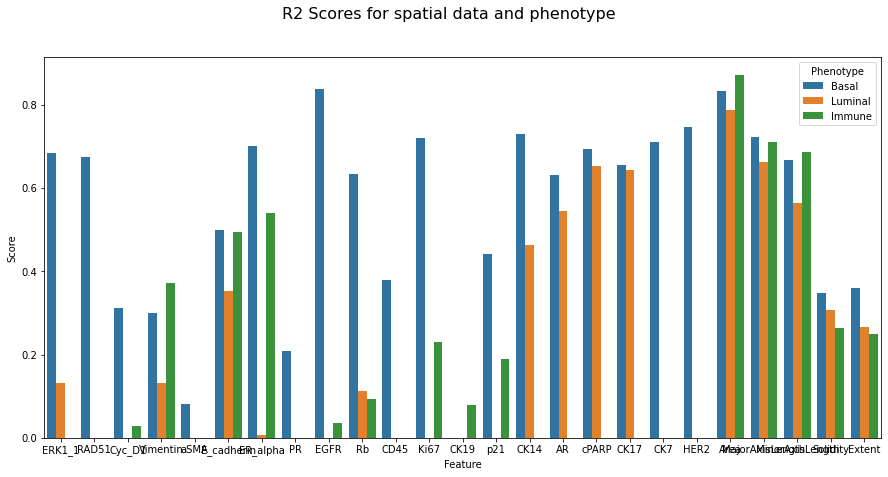

In [355]:
fig = plt.figure()
sns.barplot(x="Feature", y="Score", hue="Phenotype", data=sp_r2_scores)
fig.set_size_inches(15,7)
fig.suptitle("R2 Scores for spatial data and phenotype", fontsize=16)
